## <center>  Основные метода машинного обучения

Расммотрим задачу регрессии - задачу когда нам необходимо восстановить некоторую функцию.  
Примеры: физические измерения, хотим узнать цену на автомобиль, зарплату на вакансии  
Главное отличие от других задач машинного обучения: целевой признак - ответ - y $ \in R$  
Сентезируем задачу:  
Пусть мы имеем 100 измерений по X, распределенных равномерно на отрезке [0;5]  
Пусть истинная зависимость y(x) = 1.1*x+0.7

In [1]:
import numpy as np

In [2]:
__xRegression__ = np.random.uniform(0,5,size=(100,1))

In [3]:
def y(x):
    return 1.1*x+.7

Измерения по y cо случайным шумом, распределенным равномерно на [-0.3;0.3]

In [4]:
__yRegression__ = y(__xRegression__) + np.random.uniform(-.3,.3,size=(100,1))

In [6]:
import matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


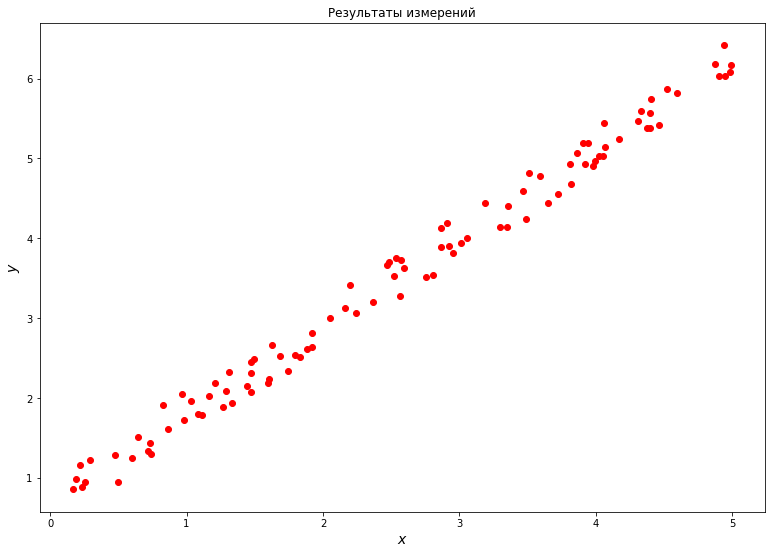

In [9]:
plt.figure(figsize=(13, 9))
plt.title('Результаты измерений')
plt.xlabel(r'$x$',fontsize=14)
plt.ylabel(r'$y$',fontsize=14)
plt.scatter(__xRegression__, __yRegression__, c='r')
plt.show()

## <center> <font color='red'> !!СЕЙЧАС БУДЕТ СТРАШНАЯ МАТЕМАТИКА!!

# <center> Линейная регрессия

Пусть имеется обучающая выборка $X=\{(x^1,y^1), \dots (x^j,y^j)\dots (x^N,y^N)\} $, $x^j=\{x_1,x_2,\dots x_d\}$ - вектор признаков $j$-ого объекта (всего $d$ признаков), $y^j$ - значение целевого признака (ответа), в задаче регрессии $y^j \in R$. Удобно представить обучающую выборку в виде  матрицы "объекты-признаки":
$$
X=\left(\matrix{x_1^1,x_2^1,\dots x_d^1 \\ x_1^2,x_2^2,\dots x_d^2\\ \dots \dots \\ x_1^N,x_2^N,\dots x_d^N}\right),
$$ в которой каждая строка содержит признаковое описание
одного из обучающих объектов ( $N$-число объектов). Таким образом, строки в этой матрице соответствуют
объектам, а столбцы - признакам.
Нашей задачей является построение функции a : $X \to Y$, которая для любого
объекта будет предсказывать ответ. Такая функция называется алгоритмом или моделью (hypothesis).
Линейная регрессионная модель сводится к сумме признаков объектов с некоторыми весами (параметры модели): 
$$
a(x)=w_0+w_1x_1+w_2x_2+\dots +w_dx_d=(\vec w,\vec x)
$$
Здесь $\vec w =\{w_0,w_1,w_2 \dots w_d \}$ - вектор весов, $\vec x =\{1,x_1,x_2 \dots x_d \}$ - вектор признаков с единичным признаком. 

Функционал качества в задачах обучения с учителем обычно задается в виде суммы по объектам выборки:
$$Q(a) = \frac 1 N \sum_{i=1}^N L(y_i, a(x_i)),$$
где $L(y, a)$ - функция потерь, задающая штраф за разницу между предсказанием и истинным значением целевого признака. 
Рассмотрим квадратичную функцию потерь 
$$
L(y,a)=(y-a)^2.
$$
Тогда задача обучения сводится к задаче оптимизации:
$$
Q(a,X)=\sum_{j=1}^N \left(y^{(j)} -(\vec w,\vec x^j) \right)^2 \to \min,
$$
или в матричном виде 
$$
Q(a,X)=\parallel Xw - y\parallel^2  \to \min,
$$
Эта задача может быть решена явно: 
$$w = (X^TX)^{-1}X^Ty.$$

Научимся запускать линейную регрессию из scikit-learn.

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
__LinearModel__ = LinearRegression(n_jobs=-1)

In [12]:
__LinearModel__.fit(__xRegression__,__yRegression__)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Посмотрим на найденные веса модели

In [21]:
__LinearModel__.intercept_[0]

0.6790513794264297

In [15]:
__LinearModel__.coef_[0][0]

1.105029758911005

In [22]:
def f(x):
    return __LinearModel__.intercept_[0] + x * __LinearModel__.coef_[0][0]

Нарисуем:  
Синим - исходная зависимиость  
Зееным - найденная

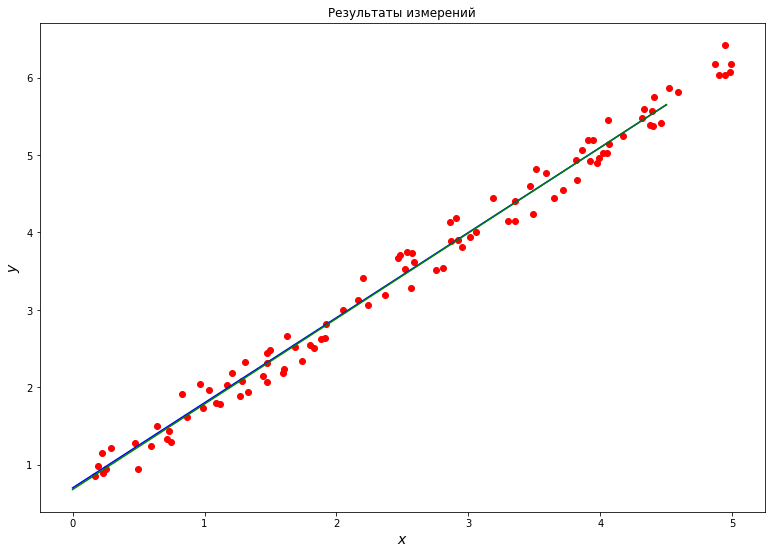

In [23]:
x = np.arange(0, 5.0, 0.5)
plt.figure(figsize=(13, 9))
plt.title('Результаты измерений')
plt.xlabel(r'$x$',fontsize=14)
plt.ylabel(r'$y$',fontsize=14)
plt.scatter(__xRegression__, __yRegression__, c='r')
plt.plot(x,y(x),c='b')
plt.plot(x,f(x),c='g')
plt.show()

Но что делать, если исходная зависимость нелинейная?  
Рассмотрим $ y(x) = 0.653 x^3 + x + 1.789 $

In [27]:
def y2(x):
    return 0.653*x**3 + x + 1.789

In [28]:
__xRegression2__ = np.random.uniform(1,10,size=(100,1))

In [29]:
__yRegression2__ = y2(__xRegression2__) + np.random.uniform(-3,3,size=(100,1))

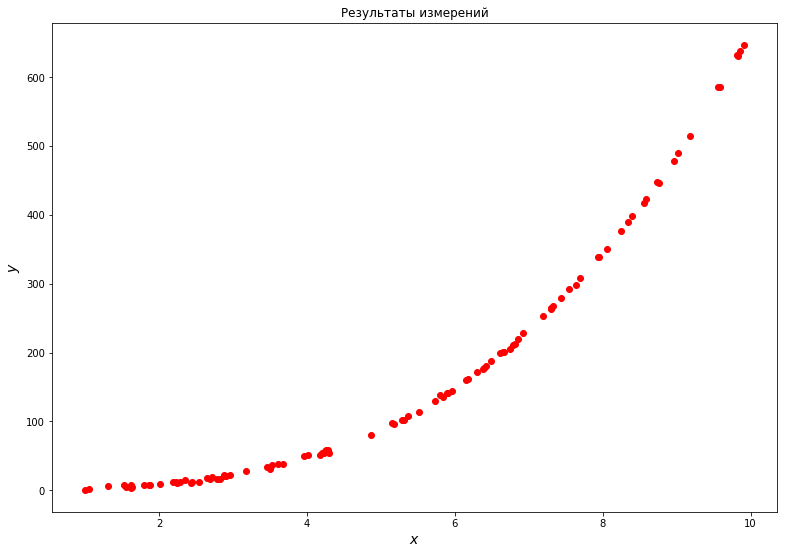

In [30]:
plt.figure(figsize=(13, 9))
plt.title('Результаты измерений')
plt.xlabel(r'$x$',fontsize=14)
plt.ylabel(r'$y$',fontsize=14)
plt.scatter(__xRegression2__, __yRegression2__, c='r')
plt.show()

Попробуем сделать тоже самое, что в первом примере

In [31]:
__LinearModel__.fit(__xRegression2__,__yRegression2__)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [32]:
def f(x):
    return __LinearModel__.intercept_[0] + x * __LinearModel__.coef_[0][0]

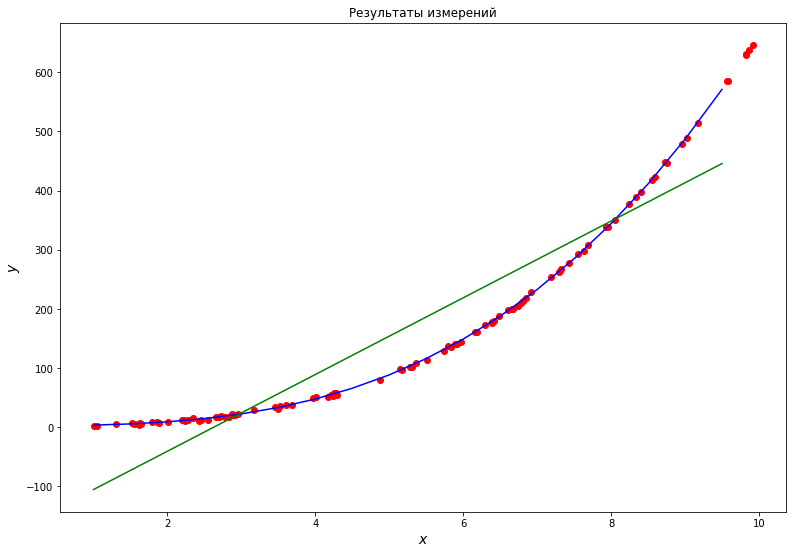

In [34]:
x = np.arange(1, 10.0, 0.5)
plt.figure(figsize=(13, 9))
plt.title('Результаты измерений')
plt.xlabel(r'$x$',fontsize=14)
plt.ylabel(r'$y$',fontsize=14)
plt.scatter(__xRegression2__, __yRegression2__, c='r')
plt.plot(x,y2(x),c='b')
plt.plot(x,f(x),c='g')
plt.show()

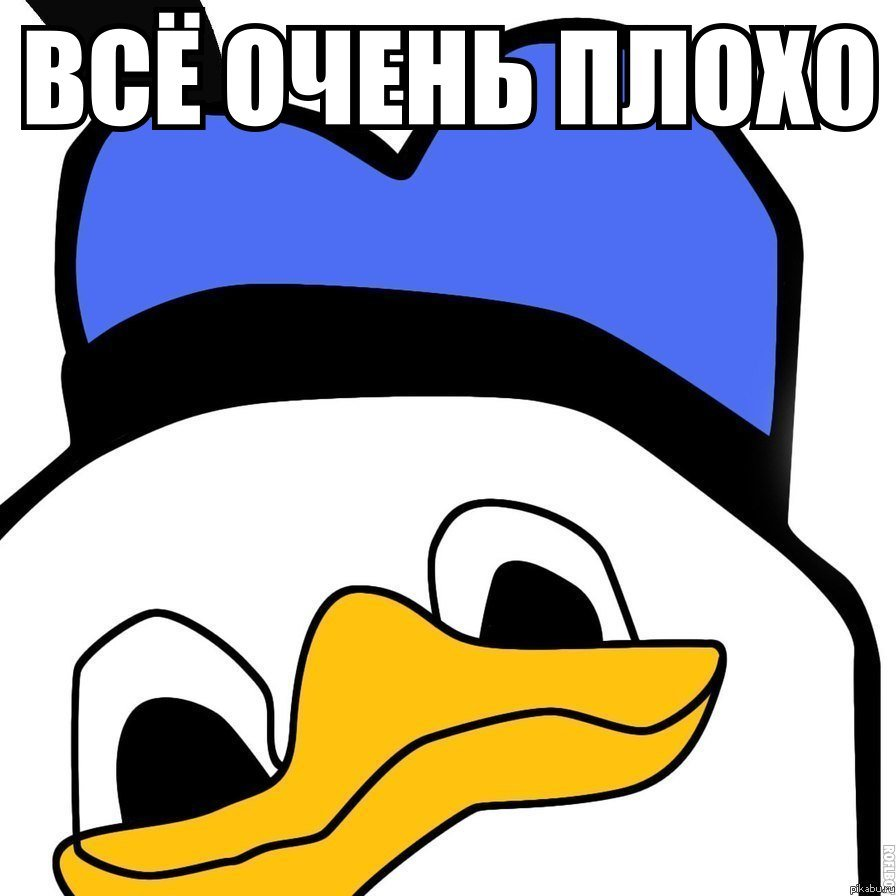

А если исскуственно добавить новый признак к исходным данным?  
Добавим столбик $x^2$

In [39]:
__xRegression2New__ =  np.hstack([__xRegression2__,__xRegression2__**2])

In [40]:
__LinearModel__.fit(__xRegression2New__,__yRegression2__)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [43]:
def f(x):
    return __LinearModel__.intercept_[0] + x * __LinearModel__.coef_[0][0] + (x**2)*__LinearModel__.coef_[0][1]

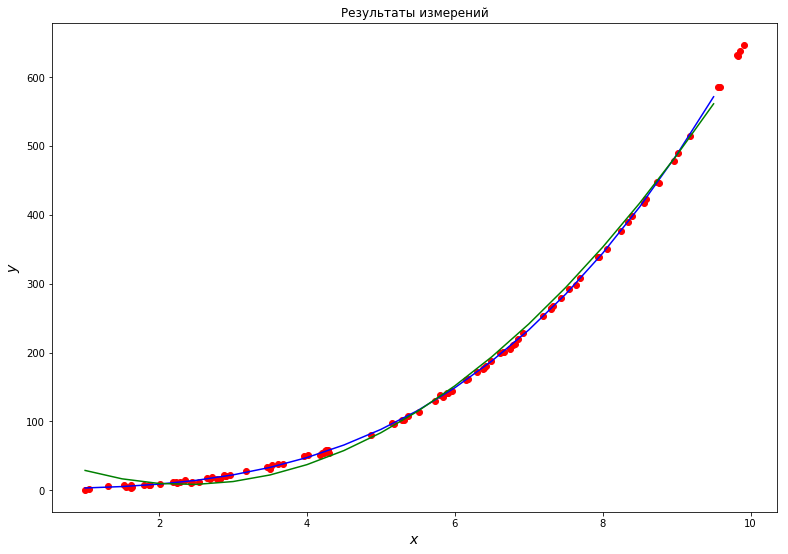

In [44]:
x = np.arange(1, 10.0, 0.5)
plt.figure(figsize=(13, 9))
plt.title('Результаты измерений')
plt.xlabel(r'$x$',fontsize=14)
plt.ylabel(r'$y$',fontsize=14)
plt.scatter(__xRegression2__, __yRegression2__, c='r')
plt.plot(x,y2(x),c='b')
plt.plot(x,f(x),c='g')
plt.show()

В итоге даже приблежение исходной функции 3 степени функцией 2 степени неплохо работает
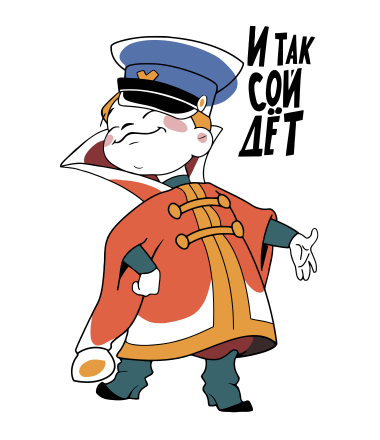

О чем мы умолчали, чтобы не травмировать вас:  
О регуляризации -  то есть 'наказание' для алгоритма за слишком большие веса